<a href="https://colab.research.google.com/github/fahm8/Kel-I---CapstoneProject/blob/main/Capstone_Project_(Kel_I).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

In [62]:
# URL raw dari file CSV
url = 'https://raw.githubusercontent.com/fahm8/Kel-I---CapstoneProject/refs/heads/main/alumni.csv'

# Membaca data dari file CSV
df = pd.read_csv(url)

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe Variabe df = ", type(df))
df.head()

baris =  435 , Kolom (jumlah variabel) =  23
Tipe Variabe df =  <class 'pandas.core.frame.DataFrame'>


,Timestamp,Nomor Induk Mahasiswa (NIM),Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,No HP (WhatsApp):,email,Waktu Mendapatkan Pekerjaan:,Status saat ini:,Tahun Wirausaha,...,Penghasilan,Univeritas,Tahun Masuk Studi Lanjut:,Nama jurusan/program studi setelah Kuliah di FST UIN Jakarta:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Saran,Program Studi,Lama Bekerja di Institusi Saat ini:,Kota tempat bekerja saat Ini
0,7/3/2024 8:09:54,1,2019,2023,Februari,85267511845,1@gmail.com,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,...,NaN,NaN,NaN,NaN,4,4,"Saran, dari prodi membuka kesempatan bekerja s...",Prodi Teknik Pertambangan,NaN,NaN
1,6/4/2024 11:27:37,2,2018,2024,Mei,85267511846,2@gmail.com,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,...,NaN,NaN,NaN,NaN,4,4,NaN,Agribisnis S1,NaN,NaN
2,6/4/2024 11:28:30,3,2018,2024,Mei,85267511847,3@gmail.com,6-12 bulan,Karyawan Swasta,NaN,...,NaN,NaN,NaN,NaN,5,5,NaN,Agribisnis S1,NaN,NaN
3,6/4/2024 11:28:55,4,2017,2024,Mei,85267511848,1@gmail.com,Kurang dari 3 bulan.,Melamar Pekerjaan,NaN,...,NaN,NaN,NaN,NaN,4,4,NaN,Agribisnis S1,NaN,NaN
4,6/4/2024 11:29:04,5,2019,2024,Mei,85267511849,2@gmail.com,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,...,NaN,NaN,NaN,NaN,4,4,NaN,Agribisnis S1,NaN,NaN


# PreProcessing

In [63]:
df = df.drop(['Nomor Induk Mahasiswa (NIM)', 'No HP (WhatsApp):', 'email', 'Lama Bekerja di Institusi Saat ini:', 'Kota tempat bekerja saat Ini' ], axis=1)
df

,Timestamp,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan:,Status saat ini:,Tahun Wirausaha,Bidang wirausaha:,Perusahaan,Posisi,Penghasilan,Univeritas,Tahun Masuk Studi Lanjut:,Nama jurusan/program studi setelah Kuliah di FST UIN Jakarta:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Saran,Program Studi
0,7/3/2024 8:09:54,2019,2023,Februari,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,"Saran, dari prodi membuka kesempatan bekerja s...",Prodi Teknik Pertambangan
1,6/4/2024 11:27:37,2018,2024,Mei,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,Agribisnis S1
2,6/4/2024 11:28:30,2018,2024,Mei,6-12 bulan,Karyawan Swasta,NaN,NaN,AHHA Korpora Indonesia,Host Live,NaN,NaN,NaN,NaN,5,5,NaN,Agribisnis S1
3,6/4/2024 11:28:55,2017,2024,Mei,Kurang dari 3 bulan.,Melamar Pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,Agribisnis S1
4,6/4/2024 11:29:04,2019,2024,Mei,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,Agribisnis S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,9/11/2024 13:28:49,2020,2024,November,1,Karyawan Swasta,NaN,NaN,Perhimpunan Ahli Pertambangan Indonesia,Copywriter ESG Nikel,NaN,NaN,NaN,NaN,4,5,"Adanya program job fair untuk para alumni, yan...",Prodi Teknik Pertambangan
431,9/18/2024 15:07:10,2019,2024,November,1,Karyawan Swasta,-,-,PT. Satwa Medika Utama,Staff Admin,3.5,-,-,-,4,5,Alhamdulillah semua berjalan dengan baik. Semo...,Prodi Agribisnis
432,10/14/2024 14:49:49,2020,2024,November,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,saran untuk prodi membuat jadwal seminar supay...,Prodi Agribisnis
433,10/15/2024 14:43:58,2020,2024,November,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,Prodi Agribisnis


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 18 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Timestamp                                                       435 non-null    object
 1   Tahun Masuk UIN Jakarta                                         435 non-null    object
 2   Tahun Wisuda                                                    435 non-null    object
 3   Bulan Wisuda                                                    435 non-null    object
 4   Waktu Mendapatkan Pekerjaan:                                    435 non-null    object
 5   Status saat ini:                                                423 non-null    object
 6   Tahun Wirausaha                                                 46 non-null     object
 7   Bidang wirausaha:                                             

In [65]:
# mengganti nama kolom 'Nama jurusan/program studi setelah Kuliah di FST UIN Jakarta:' dan 'Univeritas'
df.rename(columns={'Nama jurusan/program studi setelah Kuliah di FST UIN Jakarta: ': 'Program Studi Lanjutan',
                   'Univeritas':'Universitas'}, inplace=True)

In [66]:
# memeriksa entri data di tiap variabel, apakah ada noise
for kolom in df.columns:
    print(f'kolom: {kolom}\ntotal unique: {df[kolom].nunique()}\nunique: {df[kolom].unique()}\n')

kolom: Timestamp
total unique: 435
unique: ['7/3/2024 8:09:54' '6/4/2024 11:27:37' '6/4/2024 11:28:30'
 '6/4/2024 11:28:55' '6/4/2024 11:29:04' '6/4/2024 11:30:08'
 '6/4/2024 11:30:54' '6/4/2024 11:34:17' '6/4/2024 12:04:36'
 '6/4/2024 12:07:40' '6/5/2024 15:37:22' '6/6/2024 8:37:12'
 '6/25/2024 10:49:22' '6/26/2024 14:36:05' '6/26/2024 14:39:47'
 '6/26/2024 14:42:03' '6/26/2024 14:43:08' '6/26/2024 14:45:23'
 '6/26/2024 14:45:32' '6/26/2024 14:45:58' '6/26/2024 14:47:28'
 '6/26/2024 14:49:44' '6/26/2024 14:50:35' '6/26/2024 15:01:54'
 '6/26/2024 15:10:17' '6/26/2024 15:17:35' '6/26/2024 15:22:42'
 '6/26/2024 16:09:37' '6/26/2024 16:10:16' '6/26/2024 16:10:46'
 '6/26/2024 16:14:26' '6/26/2024 16:16:25' '6/26/2024 16:27:06'
 '6/26/2024 16:30:00' '6/26/2024 16:41:17' '6/26/2024 16:45:41'
 '6/26/2024 17:02:12' '6/26/2024 17:12:49' '6/26/2024 17:39:52'
 '6/26/2024 17:43:43' '6/26/2024 17:45:31' '6/26/2024 18:24:17'
 '6/26/2024 18:27:04' '6/26/2024 18:30:17' '6/26/2024 18:31:02'
 '6/26/2024

In [67]:
# Mengganti NaN, '-' dan '—' dengan None
def ubah_nan(df):
    col = df.columns
    for i in col:
        df[i] = df[i].replace([np.nan, 'nan', 'tidak ada', '-','—', 0],None)
ubah_nan(df)

In [68]:
# Menangani noise pada kolom Tahun Masuk UIN Jakarta
df.loc[df['Tahun Masuk UIN Jakarta'] == "2019 Genap", 'Tahun Masuk UIN Jakarta'] = 2019
df.loc[df['Tahun Masuk UIN Jakarta'] == "206", 'Tahun Masuk UIN Jakarta'] = 2006
df.loc[df['Tahun Masuk UIN Jakarta'] == "11180910000098", 'Tahun Masuk UIN Jakarta'] = 2018
df.loc[df['Tahun Masuk UIN Jakarta'] == "208", 'Tahun Masuk UIN Jakarta'] = 2018

df.loc[df['Tahun Wisuda'] == "22 Oktober 2020", 'Tahun Wisuda'] = 2020


In [69]:
# Mengganti 'Kurang dari 3 bulan', '3-6 Bulan', '6-12 bulan' dengan nilai median
mapping = {
    'Belum mendapatkan pekerjaan': 'Belum Mendapat Pekerjaan',
    'Tidak berencana mencari pekerjaan': 'Belum Mendapat Pekerjaan', # Mengasumsikan bahwa Tidak berencana mencari pekerjaan berarti Belum Mendapat Pekerjaan
    'Kurang dari 3 bulan.': '2',
    '3-6 Bulan': '5', # Mengasumsikan bahwa 3-6 Bulan berarti 4 bulan
    '6-12 bulan': '9', # Mengasumsikan bahwa 6-12 bulan berarti 9 bulan
    '>12 bulan': 'Lebih dari 12 bulan',
    'lebih dari 12 bulan.': 'Lebih dari 12 bulan'
}

# Membersihkan dan menyamakan kolom
df['Waktu Mendapatkan Pekerjaan:'] = df['Waktu Mendapatkan Pekerjaan:'].replace(mapping)

# Melihat hasil
print(df['Waktu Mendapatkan Pekerjaan:'].unique())

['Belum Mendapat Pekerjaan' '9' '2' '5' 'Lebih dari 12 bulan' '1' '6' '3'
 '10' '4' '12']


In [70]:
# Mengkategorikan beberapa status dengan status yang sama pada kolom 'Status saat ini:'
mapping = {
    'Melamar Pekerjaan' : 'Belum mendapat pekerjaan',
    'Karyawan Swasta' : 'Karyawan Swasta',
    'Pengajar' : 'Pengajar',
    'ASN/PNS' : 'ASN/PNS',
    'Karyawan BUMN' : 'Karyawan BUMN',
    'Pegawai Tetap ' : 'Karyawan Swasta',
    'Melanjutkan Studi' : 'Melanjutkan Studi',
    'Wirausaha' : 'Wirausaha',
    'Mengelola Yayasan Pendidikan' : 'Wirausaha',
    'Internship' : 'Internship',
    'Mengurus Rumah Tangga' : 'Mengurus Rumah Tangga',
    'Mendaftar studi magister' : 'Melanjutkan Studi',
    'Pegawai tidak tetap instansi pemerintah' : 'ASN/PNS',
    'Mendapatkan Pekerjaan' : 'Karyawan Swasta',
    'Operator Sekolah' : 'Karyawan Swasta',
    'Part time' : 'Karyawan Swasta',
    'Staf' : 'ASN/PNS',
    'Free Lancer dan Co-Founder' : 'Wirausaha',
    'Freelance' : 'Freelance',
    'Research Assistant' : 'Peneliti',
    'Magang' : 'Internship',
    'Masih dalam pendidikan untuk persyaratan pekerjaan' : 'Melanjutkan Studi',
    'internship' : 'Internship',
    'mengikuti pelatihan' : 'Melanjutkan Studi',
    'Karyawan BUMD' : 'Karyawan BUMD',
    'Menganggur' : 'Belum mendapat pekerjaan',
    'Staff laboratorium ' : 'Peneliti',
    'Pengajar les dan wirausaha' : 'Wirausaha',
    'Internship ' : 'Internship',
    'Proses Wisuda' : 'Belum mendapat pekerjaan',
    'Mahasiswa' : 'Mahasiswa',
    'Pekerja Harian Lepas' : 'Freelance',
    'Karyawan ' : 'Karyawan Swasta',
    'Akan mencari pekerjaan' : 'Belum mendapat pekerjaan',
    'Content Creator' : 'Freelance',
    'Belum mendapat pekerjaan' : 'Belum mendapat pekerjaan'
}

# Membersihkan dan menyamakan kolom
df['Status saat ini:'] = df['Status saat ini:'].replace(mapping)

# Melihat hasil
print(df['Status saat ini:'].unique())

['Belum mendapat pekerjaan' 'Karyawan Swasta' 'Pengajar' 'ASN/PNS'
 'Karyawan BUMN' 'Melanjutkan Studi' 'Wirausaha' None 'Internship'
 'Mengurus Rumah Tangga' 'Freelance' 'Peneliti' 'Karyawan BUMD'
 'Mahasiswa']


In [71]:
# Menangani noise pada kolom 'Penghasilan'
df.loc[df['Penghasilan'] == "11.000", 'Penghasilan'] = 11
df.loc[df['Penghasilan'] == "5.000.000", 'Penghasilan'] = 5
df.loc[df['Penghasilan'] == "7.000", 'Penghasilan'] = 7
df.loc[df['Penghasilan'] == "2.500", 'Penghasilan'] = 2.5
df.loc[df['Penghasilan'] == "300.000", 'Penghasilan'] = 0.3
df.loc[df['Penghasilan'] == "6.700.000", 'Penghasilan'] = 6.7
df.loc[df['Penghasilan'] == "250", 'Penghasilan'] = 2.5

In [72]:
# Ubah ke satuan juta (misalnya dari '1' menjadi 1.000.000)
df['Penghasilan'] = pd.to_numeric(df['Penghasilan'], errors='coerce')
df['Penghasilan'] = df['Penghasilan'] * 1_000_000


In [73]:
df[df['Timestamp']=='2024-06-28 17:24:53']

,Timestamp,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan:,Status saat ini:,Tahun Wirausaha,Bidang wirausaha:,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut:,Program Studi Lanjutan,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Saran,Program Studi


In [74]:
# Menangani noise pada kolom 'Penghasilan'
df.loc[df['Timestamp']=='2024-06-28 17:24:53', 'Penghasilan'] = 4900000

In [75]:
#Mengubah nama Universitas
universitas_mapping = {
    'IPB ': 'IPB',
    'IPB': 'IPB',
    'IPB University': 'IPB',
    'Institut Pertanian Bogor': 'IPB',
    'ITB Bandung': 'ITB',
    'Institut Teknologi Bandung': 'ITB',
    'UGM': 'UGM',
    'Universitas Gadjah Mada': 'UGM',
    'Universitas Indonesia': 'UI',
    'Universitas Indonesia (Depok)': 'UI',
    'Universitas Indonesia, Depok': 'UI',
    'Uin': 'UIN',
    'Universitas Andalas, Padang ': 'Universitas Andalas',
    'Universitas Krisnadwipanaya (UNKRIS)': 'UNKRIS',
    'Kwik Kian Gie School of Business (Jakarta)': 'Kwik Kian Gie School of Business',
    'Politeknik Elektronika Negeri Surabaya': 'Politeknik Elektronika Negeri Surabaya',
    'Innopolis University, Tatarstan, Russia': 'Innopolis University',
    'Universitas Mercubuana': 'Universitas Mercubuana',
    'Belum' : None,
    '5.000.000' : None
}

# Mengganti nama universitas berdasarkan dictionary
df['Universitas'] = df['Universitas'].replace(universitas_mapping)

In [76]:
df[df['Universitas']=='Baru mau mendaftar di semester genap']

,Timestamp,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan:,Status saat ini:,Tahun Wirausaha,Bidang wirausaha:,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut:,Program Studi Lanjutan,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Saran,Program Studi
329,7/10/2024 15:12:23,2018,2023,Agustus,1,Melanjutkan Studi,2023,Jasa Wisata Alam dan Jasa Laundry Sepatu,"Sudah tidak bekerja, perusahaan sebelumnya (Mu...",Laboran,5000000.0,Baru mau mendaftar di semester genap,Baru mau mendaftar di semester genap,Baru mau mengambil jurusan Management sustaina...,2,4,Masih kurang dalam bidang spesifik ekologi dan...,Prodi Biologi


In [77]:
df[df['Universitas']=='UIN']

,Timestamp,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan:,Status saat ini:,Tahun Wirausaha,Bidang wirausaha:,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut:,Program Studi Lanjutan,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Saran,Program Studi
82,6/28/2024 14:59:29,2019,2021,Agustus,Belum Mendapat Pekerjaan,ASN/PNS,2021,trading agribisnis,Pt. Citra niaga pangan,Ketua Tim Kerja,10000000.0,UIN,2019,Mag,5,5,Lebih di percepat,Agribisnis S2


In [78]:
df[df['Universitas']=='Kota Tangerang']

,Timestamp,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan:,Status saat ini:,Tahun Wirausaha,Bidang wirausaha:,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut:,Program Studi Lanjutan,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Saran,Program Studi
237,7/2/2024 11:40:25,2018,2022,Agustus,3,Pengajar,None,None,SDIT Quran Asyfa,Guru Kelas,NaN,Kota Tangerang,None,None,3,3,Perlunya adanya kerjasama atau mitra dengan ba...,Prodi Biologi


In [79]:
# Menangani noise pada kolom Universitas
df.loc[df['Timestamp']=='7/10/2024 15:12:23', 'Tahun Masuk Studi Lanjut:'] = None
df.loc[df['Timestamp']=='7/10/2024 15:12:23', 'Program Studi Lanjutan'] = None
df.loc[df['Timestamp']=='7/10/2024 15:12:23', 'Universitas'] = None

df.loc[df['Universitas']=='UIN', 'Tahun Masuk Studi Lanjut:'] = None
df.loc[df['Universitas']=='UIN', 'Program Studi Lanjutan'] = None
df.loc[df['Universitas']=='UIN', 'Universitas'] = None

df.loc[df['Universitas']=='Kota Tangerang', 'Universitas'] = None

In [80]:
mapping = {
    '2016, 2024' : '[2016, 2024]',
    '2012 ITB, dan 2019 UGM' : '[2012, 2019]',
    'S2: 2019, S3: 2023' : '[2019, 2023]',
    'Baru mau mendaftar di semester genap' : None
}
df['Tahun Masuk Studi Lanjut:'] = df['Tahun Masuk Studi Lanjut:'].replace(mapping)

In [81]:
# Membuat kolom baru 'Lama Kuliah'
for i in range(len(df['Tahun Masuk UIN Jakarta'])):
    try:
        tahun_wisuda = int(df['Tahun Wisuda'][i])
        tahun_masuk = int(df['Tahun Masuk UIN Jakarta'][i])

        if str(tahun_masuk).isalnum() and str(tahun_wisuda).isalnum():
            Lama_Kuliah = tahun_wisuda - tahun_masuk
            df.loc[i, 'Lama Kuliah'] = Lama_Kuliah
    except ValueError:
        print(f"Warning: Could not convert values to integers for row {i}")
        df.loc[i, 'Lama Kuliah'] = float('nan')

df['Lama Kuliah'] = df['Lama Kuliah'].astype('int64')
df.head()

,Timestamp,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan:,Status saat ini:,Tahun Wirausaha,Bidang wirausaha:,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut:,Program Studi Lanjutan,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Saran,Program Studi,Lama Kuliah
0,7/3/2024 8:09:54,2019,2023,Februari,Belum Mendapat Pekerjaan,Belum mendapat pekerjaan,None,None,None,None,NaN,None,None,None,4,4,"Saran, dari prodi membuka kesempatan bekerja s...",Prodi Teknik Pertambangan,4
1,6/4/2024 11:27:37,2018,2024,Mei,Belum Mendapat Pekerjaan,Belum mendapat pekerjaan,None,None,None,None,NaN,None,None,None,4,4,None,Agribisnis S1,6
2,6/4/2024 11:28:30,2018,2024,Mei,9,Karyawan Swasta,None,None,AHHA Korpora Indonesia,Host Live,NaN,None,None,None,5,5,None,Agribisnis S1,6
3,6/4/2024 11:28:55,2017,2024,Mei,2,Belum mendapat pekerjaan,None,None,None,None,NaN,None,None,None,4,4,None,Agribisnis S1,7
4,6/4/2024 11:29:04,2019,2024,Mei,Belum Mendapat Pekerjaan,Belum mendapat pekerjaan,None,None,None,None,NaN,None,None,None,4,4,None,Agribisnis S1,5


In [82]:
# Mengecek noise pada kolom 'Lama Kuliah'
df_filtered = df[df['Lama Kuliah'] < 4]
df_filtered

,Timestamp,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan:,Status saat ini:,Tahun Wirausaha,Bidang wirausaha:,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut:,Program Studi Lanjutan,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Saran,Program Studi,Lama Kuliah
50,6/26/2024 19:03:12,2021,2023,Agustus,Belum Mendapat Pekerjaan,ASN/PNS,None,None,Kementerian Pertanian,Koodinator Kelompok Subtansi Kelembagaan Pembi...,15000000.0,None,None,None,3,4,Penyesuaian kurikulum sejalan dengan perkemban...,Agribisnis S2,2
79,6/27/2024 15:43:22,2020,2023,Mei,9,ASN/PNS,None,None,Universitas Terbuka,Dosen (Asisten Ahli),5000000.0,None,None,None,5,3,Mohon komunikasi internal organisasi di antara...,Agribisnis S2,3
82,6/28/2024 14:59:29,2019,2021,Agustus,Belum Mendapat Pekerjaan,ASN/PNS,2021,trading agribisnis,Pt. Citra niaga pangan,Ketua Tim Kerja,10000000.0,None,None,None,5,5,Lebih di percepat,Agribisnis S2,2
85,6/28/2024 15:28:11,2020,2023,Mei,2,Wirausaha,2011,Jasa Konsultan,PT. Jagad Raya Konstindo,Tenaga Ahli,NaN,None,None,None,4,4,Tetap pertahankan matakuliah dimasukkan kaidah...,Agribisnis S2,3
92,6/28/2024 16:35:43,2020,2023,Mei,2,ASN/PNS,None,None,Kementerian Pertanian,Analis Prasarana dan Sarana Pertanian,9000000.0,None,None,None,5,5,"Sejauh ini sudah baik, seluruh dosen dan admin...",Agribisnis S2,3
98,6/28/2024 17:09:05,2009,2010,Agustus,2,ASN/PNS,None,None,BMKG,Ketua Tim Bidang Geofisika Potensial,14000000.0,"ITB Bandung, UGM","[2012, 2019]",Sains kebumian dan geografi,4,4,None,Fisika,1


In [83]:
# Menghapus baris noise
df = df[df['Timestamp'] != '6/28/2024 17:09:05']

In [84]:
# Mengganti nama Program Studi
df.loc[df['Program Studi'] == "Kimia", 'Program Studi'] = 'Prodi Kimia'
df.loc[df['Program Studi'] == "Biologi", 'Program Studi'] = 'Prodi Biologi'
df.loc[df['Program Studi'] == "Fisika", 'Program Studi'] = 'Prodi Fisika'
df.loc[df['Program Studi'] == "Matematika", 'Program Studi'] = 'Prodi Matematika'
df.loc[df['Program Studi'] == "Agribisnis S1", 'Program Studi'] = 'Prodi Agribisnis S1'
df.loc[df['Program Studi'] == "Prodi Agribisnis", 'Program Studi'] = 'Prodi Agribisnis S1'
df.loc[df['Program Studi'] == "Prodi TI", 'Program Studi'] = 'Prodi Teknik Informatika'
df.loc[df['Program Studi'] == "Teknik Informatika", 'Program Studi'] = 'Prodi Teknik Informatika'
df.loc[df['Program Studi'] == "Prodi MAG", 'Program Studi'] = 'Prodi Agribisnis S2'
df.loc[df['Program Studi'] == "Agribisnis S2", 'Program Studi'] = 'Prodi Agribisnis S2'

In [85]:
# Mengubah tipe data
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp'] = df['Timestamp'].dt.date
df['Tahun Masuk UIN Jakarta'] = df['Tahun Masuk UIN Jakarta'].astype('int64')
df['Tahun Wisuda'] = df['Tahun Wisuda'].astype('int64')
df['Bulan Wisuda'] = df['Bulan Wisuda'].astype('category')
df['Waktu Mendapatkan Pekerjaan:'] = df['Waktu Mendapatkan Pekerjaan:'].astype('category')
df['Status saat ini:'] = df['Status saat ini:'].astype('category')
df['Tahun Wirausaha'] = df['Tahun Wirausaha'].astype('category')
df['Penghasilan'] = df['Penghasilan'].astype('float64')
df['Program Studi Lanjutan'] = df['Program Studi Lanjutan'].astype('category')
df['Kesesuaian Bidang Ilmu:'] = df['Kesesuaian Bidang Ilmu:'].astype('int64')
df['Kesesuaian Kurikulum:'] = df['Kesesuaian Kurikulum:'].astype('int64')
df['Program Studi'] = df['Program Studi'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 434 entries, 0 to 434
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Timestamp                     434 non-null    object  
 1   Tahun Masuk UIN Jakarta       434 non-null    int64   
 2   Tahun Wisuda                  434 non-null    int64   
 3   Bulan Wisuda                  434 non-null    category
 4   Waktu Mendapatkan Pekerjaan:  434 non-null    category
 5   Status saat ini:              422 non-null    category
 6   Tahun Wirausaha               30 non-null     category
 7   Bidang wirausaha:             31 non-null     object  
 8   Perusahaan                    221 non-null    object  
 9   Posisi                        224 non-null    object  
 10  Penghasilan                   205 non-null    float64 
 11  Universitas                   27 non-null     object  
 12  Tahun Masuk Studi Lanjut:     27 non-null     object  


<ipython-input-85-028bb36d7e91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
<ipython-input-85-028bb36d7e91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = df['Timestamp'].dt.date
<ipython-input-85-028bb36d7e91>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [86]:
# mengecek apakah ada duplikat data?
print(df.shape)
df.duplicated().sum()

(434, 19)


6

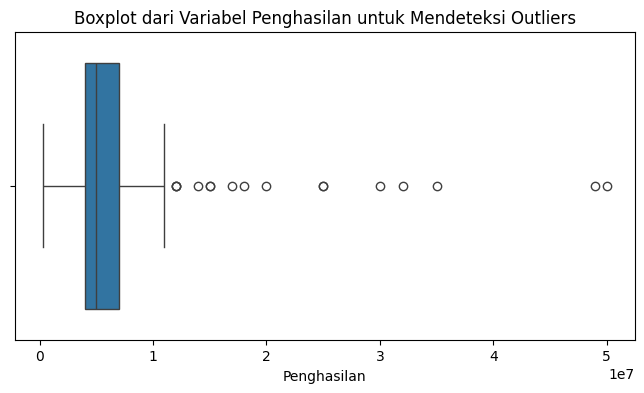

In [87]:
# Mengecek Outlier pada data
plt.figure(figsize=(8, 4))
sns.boxplot(data=df["Penghasilan"], orient="h")
plt.title('Boxplot dari Variabel Penghasilan untuk Mendeteksi Outliers')
plt.show()

In [88]:
# Menangani Outlier pada data
Q1 = df["Penghasilan"].quantile(0.25)
Q2 = df["Penghasilan"].quantile(0.50)
Q3 = df["Penghasilan"].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.

no_outlier = (df["Penghasilan"] >= Q1 - 1.5 * IQR) & (df["Penghasilan"] <= Q3 + 1.5 *IQR)

# Creating DataFrame Without Outliers
df_no_out = df[no_outlier]

# Creating DataFrame With Outliers
df_out = df[~no_outlier]

In [89]:
# Melihat data outlier
df_out.head()

,Timestamp,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan:,Status saat ini:,Tahun Wirausaha,Bidang wirausaha:,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut:,Program Studi Lanjutan,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Saran,Program Studi,Lama Kuliah
0,2024-07-03,2019,2023,Februari,Belum Mendapat Pekerjaan,Belum mendapat pekerjaan,NaN,None,None,None,NaN,None,None,NaN,4,4,"Saran, dari prodi membuka kesempatan bekerja s...",Prodi Teknik Pertambangan,4
1,2024-06-04,2018,2024,Mei,Belum Mendapat Pekerjaan,Belum mendapat pekerjaan,NaN,None,None,None,NaN,None,None,NaN,4,4,None,Prodi Agribisnis S1,6
2,2024-06-04,2018,2024,Mei,9,Karyawan Swasta,NaN,None,AHHA Korpora Indonesia,Host Live,NaN,None,None,NaN,5,5,None,Prodi Agribisnis S1,6
3,2024-06-04,2017,2024,Mei,2,Belum mendapat pekerjaan,NaN,None,None,None,NaN,None,None,NaN,4,4,None,Prodi Agribisnis S1,7
4,2024-06-04,2019,2024,Mei,Belum Mendapat Pekerjaan,Belum mendapat pekerjaan,NaN,None,None,None,NaN,None,None,NaN,4,4,None,Prodi Agribisnis S1,5


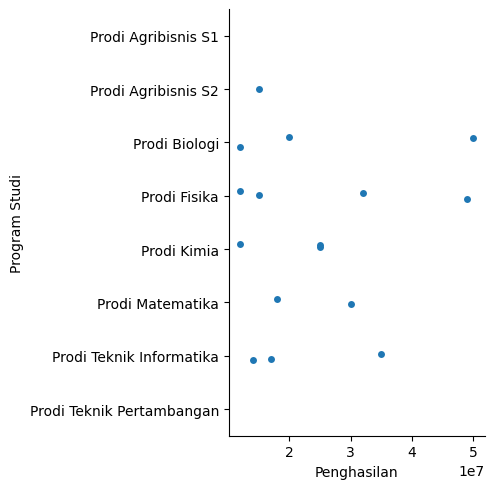

In [90]:
p = sns.catplot(x="Penghasilan", y="Program Studi", data=df_out)

Walaupun terdapat outlier pada data, Outlier tersebut tetap disertakan karena memiliki nilai informasi yang dapat menunjukkan pola unik atau kasus khusus yang relevan dengan tujuan analisis.

### Statitiska Deskriptif

In [91]:
df.describe(include='all')

,Timestamp,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan:,Status saat ini:,Tahun Wirausaha,Bidang wirausaha:,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut:,Program Studi Lanjutan,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Saran,Program Studi,Lama Kuliah
count,434,434.000000,434.000000,434,434,422,30,31,221,224,2.050000e+02,27,27,28,434.000000,434.000000,192,434,434.000000
unique,52,NaN,NaN,9,11,13,10,29,218,209,NaN,15,14,26,NaN,NaN,191,8,NaN
top,2024-06-29,NaN,NaN,November,Belum Mendapat Pekerjaan,Karyawan Swasta,2021,Kuliner,Astra Credit Companies,Staff,NaN,UI,2024,Matematika,NaN,NaN,Sudah cukup baik,Prodi Biologi,NaN
freq,76,NaN,NaN,131,160,170,8,3,2,4,NaN,7,7,3,NaN,NaN,2,97,NaN
mean,NaN,2017.112903,2022.260369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.822927e+06,NaN,NaN,NaN,3.783410,3.723502,NaN,NaN,5.147465
std,NaN,3.076945,3.123175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.431853e+06,NaN,NaN,NaN,0.875165,1.058148,NaN,NaN,1.109025
min,NaN,2002.000000,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+05,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,2.000000
25%,NaN,2017.000000,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+06,NaN,NaN,NaN,3.000000,3.000000,NaN,NaN,4.000000
50%,NaN,2018.000000,2023.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+06,NaN,NaN,NaN,4.000000,4.000000,NaN,NaN,5.000000
75%,NaN,2019.000000,2024.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000e+06,NaN,NaN,NaN,4.000000,4.750000,NaN,NaN,6.000000


#Visualisasi Preprocessing

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

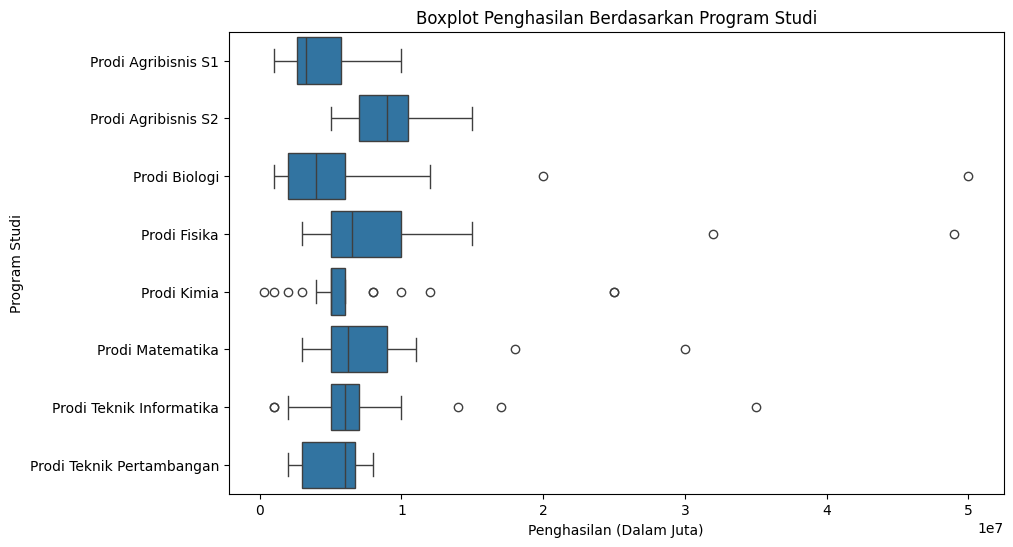

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Penghasilan', y='Program Studi', data=df)
plt.title('Boxplot Penghasilan Berdasarkan Program Studi')
plt.xlabel('Penghasilan (Dalam Juta)')
plt.ylabel('Program Studi')
plt.show()


- Teknik Informatika memiliki variasi penghasilan yang signifikan, menunjukkan bahwa lulusan dari program ini bekerja di berbagai sektor atau posisi dengan variasi gaji yang tinggi.
- Program studi seperti Agribisnis S2 dan Matematika cenderung memiliki variasi yang rendah, yang mengindikasikan bahwa sebagian besar lulusan mendapatkan penghasilan pada level yang serupa, kemungkinan karena pasar kerja yang lebih homogen atau keterbatasan dalam variasi peran yang tersedia.

Rekomendasi

1) Pengembangan Kurikulum dan Keterampilan yang Dibutuhkan Pasar: Untuk program studi dengan penghasilan rendah seperti Biologi, Kimia, dan Matematika, pihak universitas dapat melakukan penyesuaian kurikulum atau menambah pelatihan keterampilan yang sesuai dengan permintaan pasar saat ini, seperti data science, bioinformatika, atau keterampilan digital lainnya, yang dapat meningkatkan daya saing lulusan dan prospek penghasilan mereka.

2) Pendampingan Karir dan Networking: Mengadakan job fair yang melibatkan berbagai industri sehingga alumni dapat memiliki eksposur yang lebih luas dalam pencarian pekerjaan.

3) Meningkatkan Program Studi yang Potensial: Berdasarkan temuan bahwa Teknik Informatika memiliki potensi penghasilan tinggi, universitas dapat mempertimbangkan untuk memperluas daya tampung program ini, menawarkan spesialisasi yang lebih beragam, atau bahkan membuka program studi terkait lainnya yang relevan dengan industri teknologi.

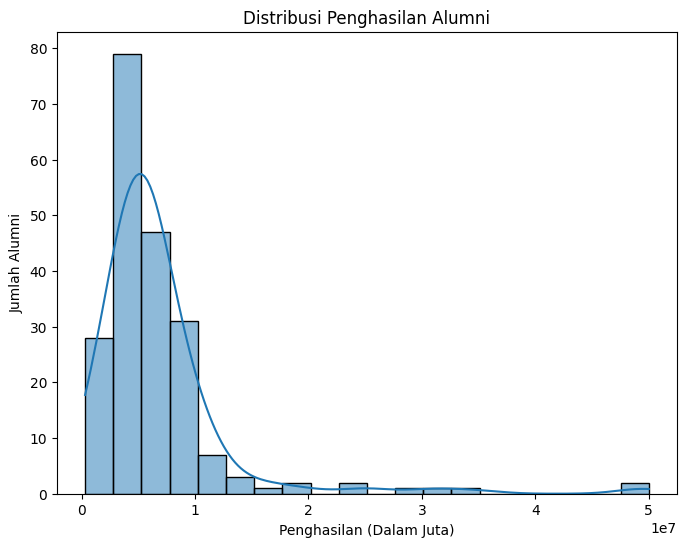

In [94]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Penghasilan'], bins=20, kde=True)
plt.title('Distribusi Penghasilan Alumni')
plt.xlabel('Penghasilan (Dalam Juta)')
plt.ylabel('Jumlah Alumni')
plt.show()

Mayoritas alumni berada pada kelompok penghasilan rendah (0-10 juta rupiah), menunjukkan bahwa sebagian besar lulusan belum mencapai posisi dengan penghasilan tinggi, kemungkinan karena keterbatasan pengalaman atau keterampilan khusus. Jumlah alumni dengan penghasilan lebih tinggi menurun drastis setelah rentang awal, dan hanya sedikit alumni yang mencapai penghasilan di atas 20 juta rupiah. Terdapat beberapa outliers dengan penghasilan sangat tinggi (di atas 50 juta rupiah), yang mungkin bekerja di sektor spesifik dengan keterampilan khusus. Distribusi ini menunjukkan adanya ketidakmerataan penghasilan yang signifikan di kalangan alumni.

Rekomendasi:

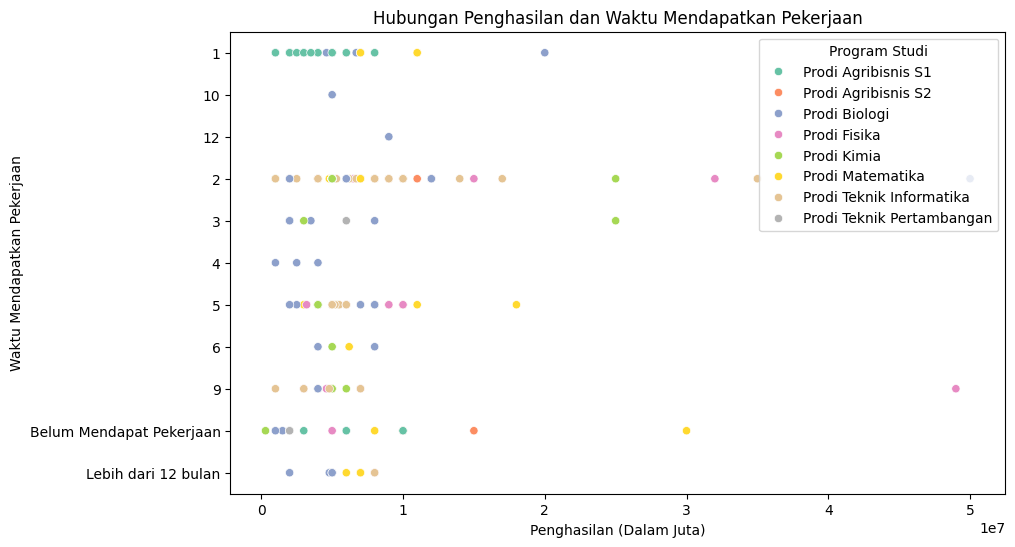

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Penghasilan', y='Waktu Mendapatkan Pekerjaan:', data=df, hue='Program Studi', palette='Set2')
plt.title('Hubungan Penghasilan dan Waktu Mendapatkan Pekerjaan')
plt.xlabel('Penghasilan (Dalam Juta)')
plt.ylabel('Waktu Mendapatkan Pekerjaan')
plt.show()

Sebagian besar alumni mendapatkan pekerjaan dalam waktu cepat (0-6 bulan), dengan penghasilan yang umumnya berada di level rendah hingga menengah. Namun, alumni dari Prodi Teknik Informatika menunjukkan potensi penghasilan yang lebih tinggi dibandingkan program studi lain, kemungkinan karena tingginya permintaan di bidang tersebut. Sebaliknya, alumni dari Prodi Agribisnis S2 dan Fisika cenderung memiliki penghasilan yang lebih rendah dan membutuhkan waktu lebih lama untuk mendapatkan pekerjaan.

In [96]:
# Mengonversi 'Waktu Mendapatkan Pekerjaan:' ke kode numerik
df['Waktu Mendapatkan Pekerjaan Num'] = df['Waktu Mendapatkan Pekerjaan:'].astype('category').cat.codes

<ipython-input-96-978efcbfe038>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Waktu Mendapatkan Pekerjaan Num'] = df['Waktu Mendapatkan Pekerjaan:'].astype('category').cat.codes


In [97]:
# Memastikan kolom untuk Pairplot hanya yang numerik
df_pairplot = df[['Penghasilan', 'Waktu Mendapatkan Pekerjaan Num']]

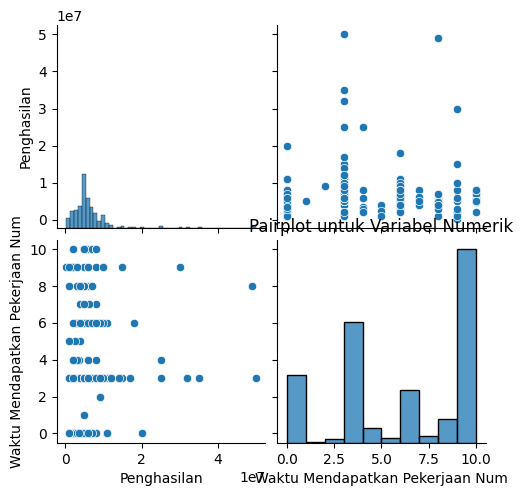

In [98]:
# Pairplot untuk hubungan antar variabel
sns.pairplot(df_pairplot)
plt.title('Pairplot untuk Variabel Numerik')
plt.show()

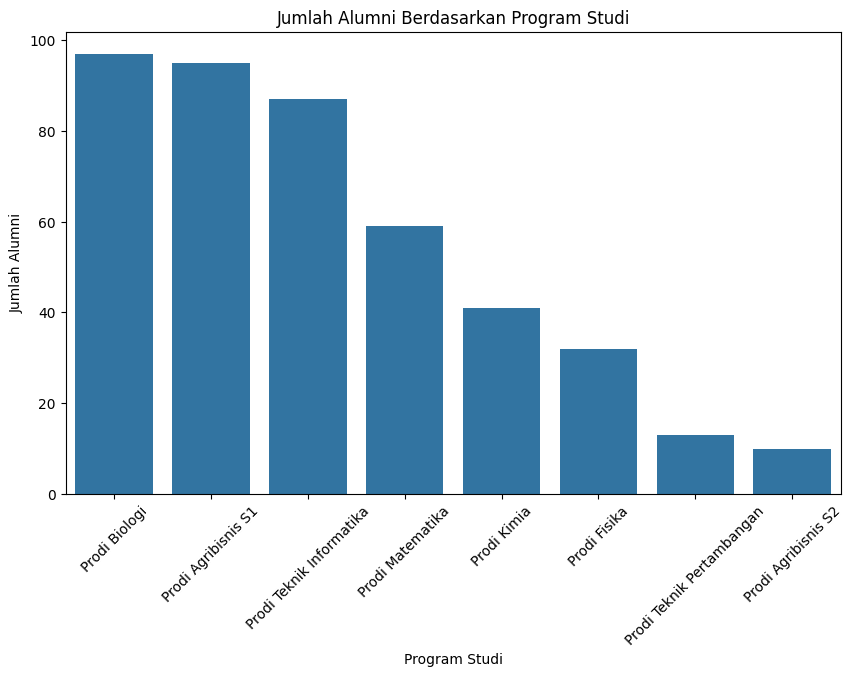

In [99]:
# Grafik Batang Jumlah Alumni Berdasarkan Program Studi
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Program Studi', order=df['Program Studi'].value_counts().index)
plt.title('Jumlah Alumni Berdasarkan Program Studi')
plt.xlabel('Program Studi')
plt.ylabel('Jumlah Alumni')
plt.xticks(rotation=45)
plt.show()

- Program Studi Populer: Biologi, Agribisnis S1, dan Teknik Informatika merupakan program studi dengan jumlah alumni terbanyak. Program-program ini cenderung diminati oleh mahasiswa dan memiliki daya tarik yang tinggi.

- Program Studi dengan Alumni Rendah: Teknik Pertambangan dan Agribisnis S2 memiliki jumlah alumni yang relatif rendah, yang dapat disebabkan oleh berbagai faktor seperti tingkat kesulitan, kapasitas terbatas, atau kurangnya minat mahasiswa.

- Rekomendasi Strategis: Universitas dapat menggunakan informasi ini untuk mengalokasikan sumber daya dengan lebih efektif, misalnya dengan menambah fasilitas di program populer atau meningkatkan promosi untuk program dengan jumlah alumni rendah.

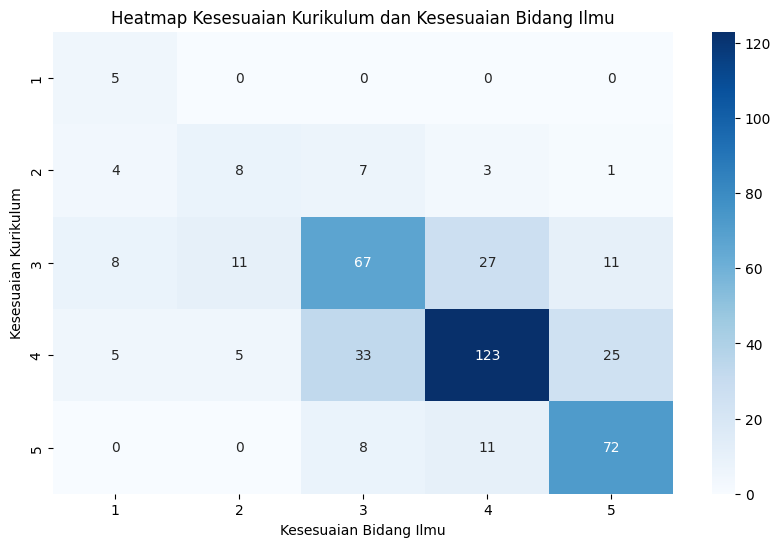

In [100]:
# Heatmap Kesesuaian Kurikulum dan Kesesuaian Bidang Ilmu
contingency_table = pd.crosstab(df['Kesesuaian Kurikulum:'], df['Kesesuaian Bidang Ilmu:'])
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap Kesesuaian Kurikulum dan Kesesuaian Bidang Ilmu')
plt.xlabel('Kesesuaian Bidang Ilmu')
plt.ylabel('Kesesuaian Kurikulum')
plt.show()

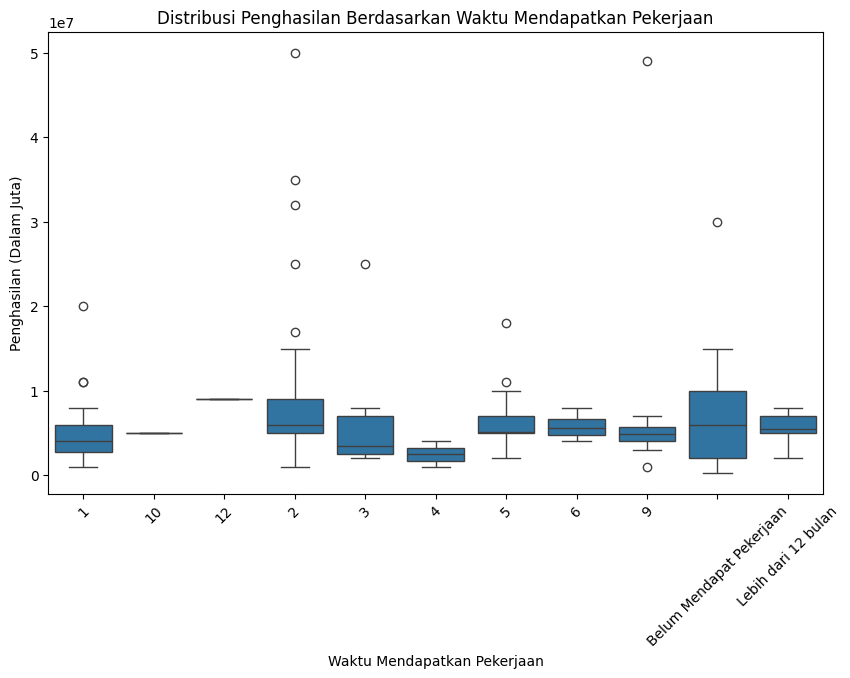

In [101]:
# Distribusi Penghasilan Berdasarkan Waktu Mendapatkan Pekerjaan
plt.figure(figsize=(10, 6))
sns.boxplot(x='Waktu Mendapatkan Pekerjaan:', y='Penghasilan', data=df)
plt.title('Distribusi Penghasilan Berdasarkan Waktu Mendapatkan Pekerjaan')
plt.xlabel('Waktu Mendapatkan Pekerjaan')
plt.ylabel('Penghasilan (Dalam Juta)')
plt.xticks(rotation=45)
plt.show()

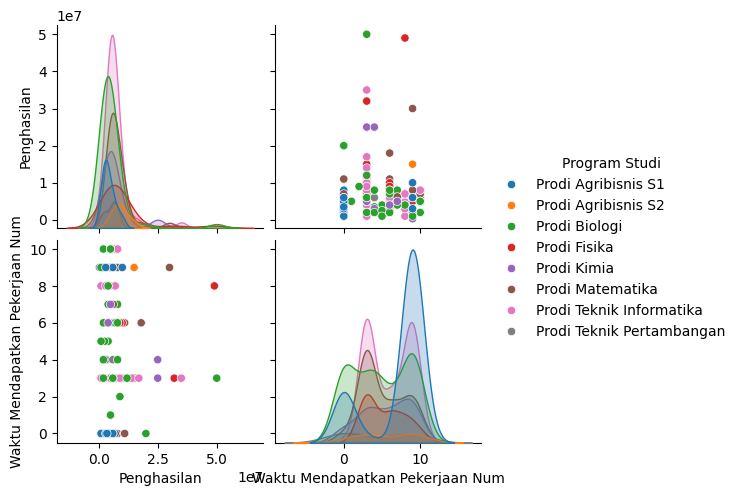

In [102]:
# Pairplot dengan Hue Berdasarkan Program Studi
sns.pairplot(df, hue='Program Studi', vars=['Penghasilan', 'Waktu Mendapatkan Pekerjaan Num'])
plt.show()


- Program studi yang lebih teknis atau yang terkait dengan sektor industri tertentu (misalnya, Biologi dan Teknik Informatika) cenderung memiliki penghasilan lebih tinggi dan waktu pencarian kerja yang lebih cepat.

- Program studi lain, seperti prodi agribisnis s1 memiliki waktu pencarian kerja yang lebih lama dan penghasilan yang lebih rendah.

- Hubungan antara waktu mendapatkan pekerjaan dan penghasilan bervariasi di antara program studi. Di beberapa program, semakin cepat seseorang mendapatkan pekerjaan, semakin tinggi penghasilan yang diperoleh.

Rekomendasi:

1) Promosi Program Studi dengan Permintaan Tinggi: Sorot Teknik Informatika dan Teknik Pertambangan sebagai program unggulan yang menjanjikan prospek kerja dan penghasilan tinggi, untuk menarik calon mahasiswa berbakat.

2) Bimbingan Karir Terarah: Berikan penyuluhan karir untuk program studi dengan waktu pencarian kerja yang lama, termasuk pelatihan wawancara dan pencocokan karir

3) Dukungan Wirausaha bagi Agribisnis: Sediakan program inkubator bisnis atau akses modal awal untuk mendorong lulusan Agribisnis memulai usaha mandiri.

<ipython-input-103-391515837df9>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  program_counts = df.groupby(["Timestamp", "Program Studi"]).size().reset_index(name="Count")


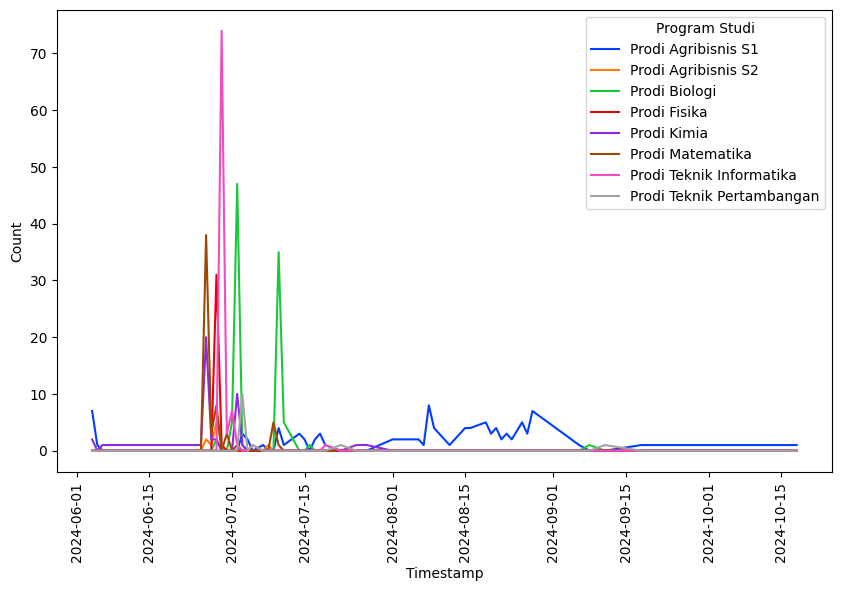

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan data berdasarkan tanggal dan program studi
program_counts = df.groupby(["Timestamp", "Program Studi"]).size().reset_index(name="Count")
# Set ukuran figure
plt.figure(figsize=(10, 6))

# Plot lineplot dengan data yang sudah diformat
p = sns.lineplot(x="Timestamp", y="Count", hue="Program Studi", data=program_counts, palette ="bright")
plt.xticks(rotation=90)
# Menampilkan plot
plt.show()


Dari visualisasi diatas dapat diketahui terdapat lonjakan partisipasi pengisian kuesioner pada akhir Juni hingga awal Juli 2024, terutama untuk mahasiswa dari program studi Matematika, Fisika, Kimia, Biologi, dan Teknik Informatika.

Sedangkan Teknik Pertambangan memiliki partisipasi yang lebih sedikit dibandingkan program lain.

Rekomendasi :
1. Berdasarkan pola partisipasi, waktu penyebaran kuesioner dapat dilakukan pada akhir Juni hingga awal Juli ketika partisipasi mahasiswa paling tinggi.
2. Untuk meningkatkan partisipasi secara keseluruhan, promosi kuesioner dapat dilakukan melalui media komunikasi kampus seperti email resmi, grup media sosial.

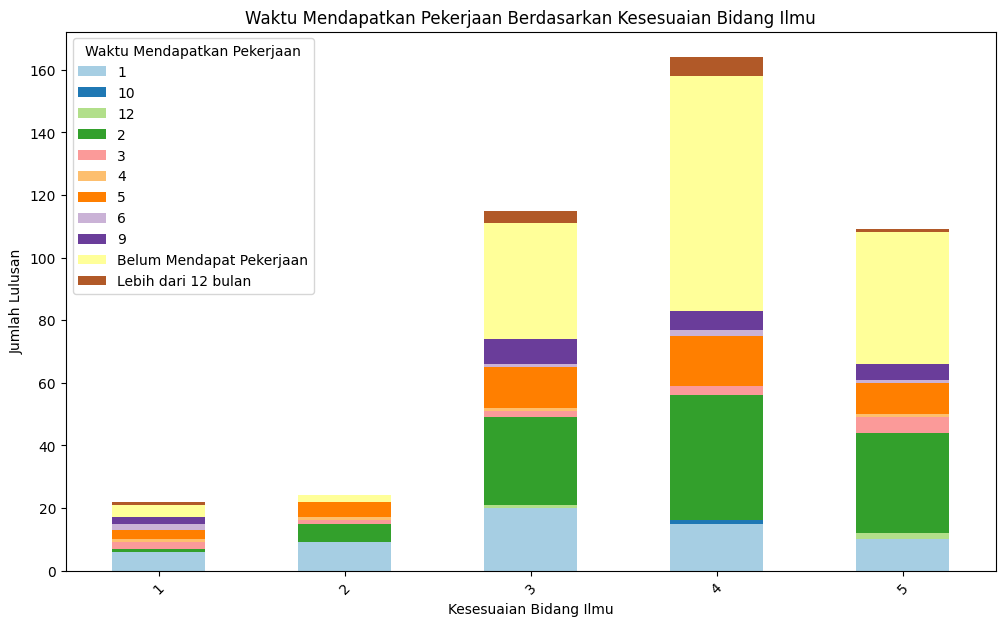

In [104]:
# Menghitung frekuensi berdasarkan jurusan
frekuensi_jurusan = df.groupby('Kesesuaian Bidang Ilmu:')['Waktu Mendapatkan Pekerjaan:'].value_counts().unstack()

# Membuat stacked bar chart
frekuensi_jurusan.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Paired')
plt.title('Waktu Mendapatkan Pekerjaan Berdasarkan Kesesuaian Bidang Ilmu')
plt.xlabel('Kesesuaian Bidang Ilmu')
plt.ylabel('Jumlah Lulusan')
plt.xticks(rotation=45)
plt.legend(title='Waktu Mendapatkan Pekerjaan')
plt.show()


Dari visualisasi diatas diketahui Kategori  3, 4 dan 5 menunjukkan jumlah lulusan yang lebih cepat mendapatkan pekerjaan dibandingkan kategori 1 dan 2. Kategori 5, memiliki lulusan yang lebih banyak mendapatkan pekerjaan dalam waktu kurang dari 12 bulan.

Rekomendasi:
1. Memperkuat hubungan dengan industri yang relevan, terutama untuk kategori 3, 4, dan 5. Agar mahasiswa dapat bekerja sesuai dengan ilmu yang ditekuni.
2. Dapat memperkenalkan potensi karir dari bidang ilmu sejak awal studi agar mahasiswa lebih sadar akan pentingnya memilih jalur karir yang sesuai.


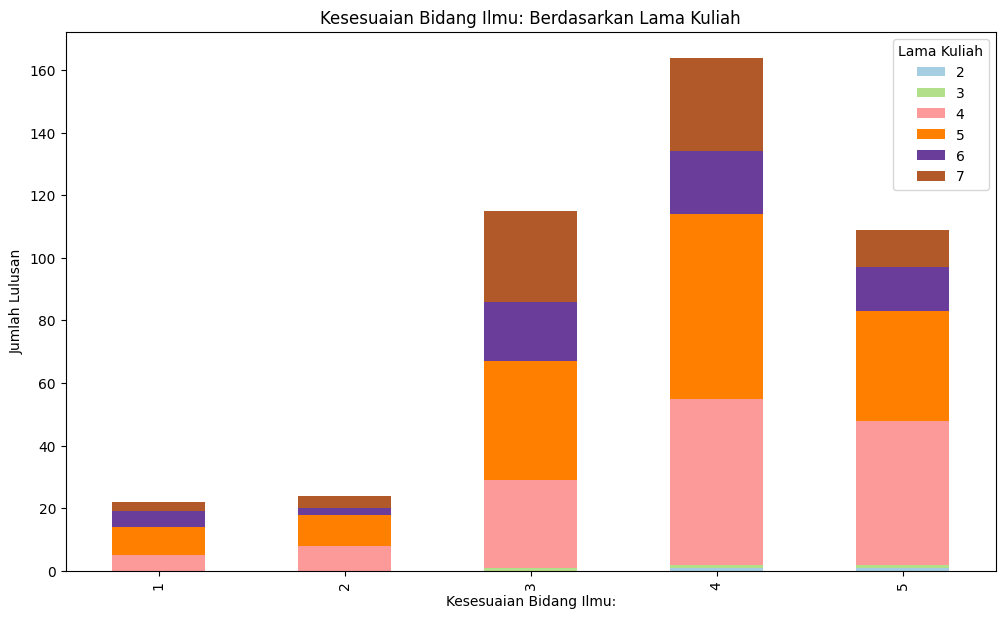

In [105]:
# Menghitung frekuensi lama kuliah
frekuensi_kuliah = df.groupby('Kesesuaian Bidang Ilmu:')['Lama Kuliah'].value_counts().unstack()

# Membuat stacked bar chart
frekuensi_kuliah.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Paired')
plt.title('Kesesuaian Bidang Ilmu: Berdasarkan Lama Kuliah')
plt.xlabel('Kesesuaian Bidang Ilmu:')
plt.ylabel('Jumlah Lulusan')
plt.xticks(rotation=90)
plt.legend(title='Lama Kuliah')
plt.show()

Berdasarkan grafik ini, berikut adalah beberapa insight yang dapat diperoleh:
- Sebagian besar lulusan memberikan penilaian 4 dan 5 terhadap kesesuaian bidang ilmu kurikulum.
- Lulusan yang menilai "4" cenderung memiliki lama kuliah yang lebih tinggi (5 hingga 7 tahun).
- Hal ini bisa menunjukkan bahwa lulusan yang menghabiskan waktu lebih lama cenderung merasa kurikulum lebih sesuai atau relevan.
- Pada nilai kesesuaian "1" dan "2", jumlah lulusan sangat rendah.

Rekomendasi :
1. Fokus pada materi yang dapat meningkatkan relevansi bagi semua bidang ilmu.

2. Bagi lulusan dengan lama kuliah 2 hingga 4 tahun, pertimbangkan adanya program, seperti kursus singkat, pelatihan khusus, atau sertifikasi

3. Mempertimbangkan untuk memasukkan lebih banyak keterampilan praktis atau pengalaman lapangan yang langsung sesuai dengan bidang kerja, sehingga lulusan merasa kurikulum lebih relevan dengan kebutuhan dunia kerja.


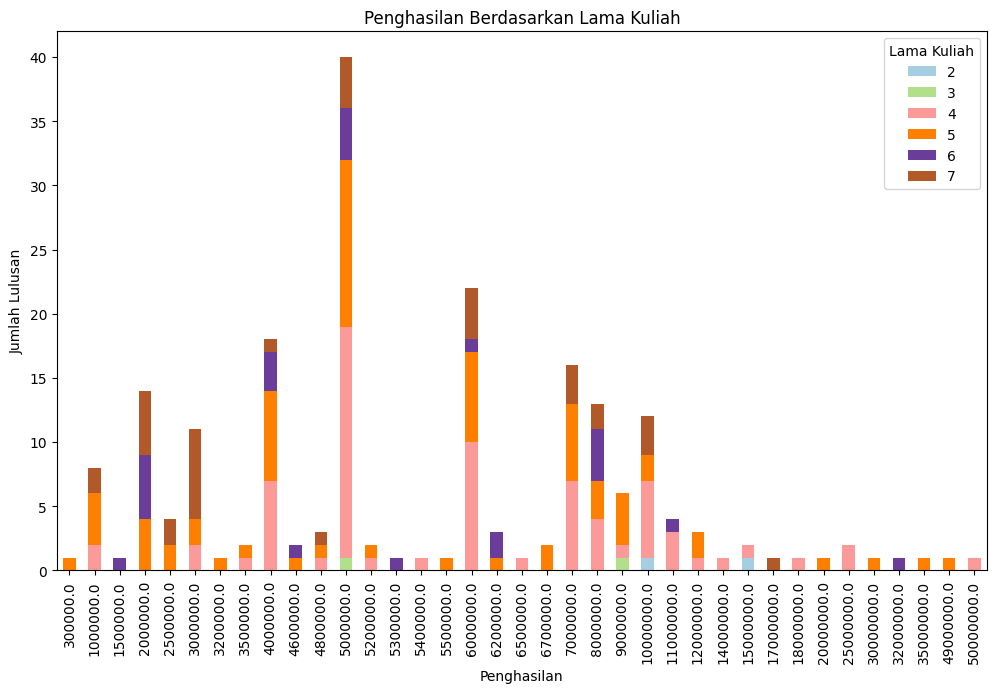

In [106]:
# Menghitung frekuensi berdasarkan lama kuliah
frekuensi_kuliah = df.groupby('Penghasilan')['Lama Kuliah'].value_counts().unstack()

# Membuat stacked bar chart
frekuensi_kuliah.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Paired')
plt.title('Penghasilan Berdasarkan Lama Kuliah')
plt.xlabel('Penghasilan')
plt.ylabel('Jumlah Lulusan')
plt.xticks(rotation=90)
plt.legend(title='Lama Kuliah')
plt.show()

Dari visualisasi diatas dapat diketahui :
- Lulusan dengan lama kuliah lebih pendek (2-4 tahun) cenderung memiliki penghasilan yang lebih rendah. Sebaliknya, lulusan dengan lama kuliah lebih lama (5-7 tahun) tampaknya lebih banyak yang memperoleh penghasilan lebih tinggi, terutama di atas 5 juta.
- Lama kuliah yang lebih lama mungkin berhubungan dengan pengalaman dan kompetensi yang lebih tinggi, yang dapat mempengaruhi peluang untuk mendapatkan penghasilan yang lebih besar.
- Terlihat bahwa lulusan yang berkuliah selama 4 dan 5 tahun mendominasi dalam berbagai rentang penghasilan, khususnya di kisaran 4-5 juta. Ini menunjukkan bahwa lulusan dengan durasi kuliah ini memiliki peluang besar dalam mendapatkan penghasilan rata-rata di pasar kerja.

Rekomendasi :
1. Untuk lulusan dengan masa studi yang lebih singkat (2-4 tahun) yang cenderung memiliki penghasilan lebih rendah, disarankan untuk dapat mengadakan program pengembangan keterampilan tambahan, seperti sertifikasi atau pelatihan keterampilan teknis.

2. Kampus dapat menjalin kerjasama dengan perusahaan atau industri yang menawarkan gaji lebih tinggi, terutama bagi lulusan yang telah menyelesaikan studi lebih lama (5-7 tahun).

3. Mengembangkan kurikulum yang lebih berorientasi pada kebutuhan industri dapat membantu lulusan dalam memperoleh keterampilan yang relevan dengan pekerjaan, sehingga memiliki peluang lebih besar untuk mendapatkan penghasilan yang lebih tinggi sejak awal.



# Clustering

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, homogeneity_score, normalized_mutual_info_score
from sklearn.impute import SimpleImputer

In [108]:
# Encode kategori
def encode_Prodi(x):
    prodi_mapping = {
        'Prodi Agribisnis S1': 0, 'Prodi Agribisnis S2': 1, 'Prodi Biologi': 2, 'Prodi Fisika': 3,
        'Prodi Kimia': 4, 'Prodi Matematika': 5, 'Prodi Teknik Informatika': 6, 'Prodi Teknik Pertambangan': 7
    }
    return prodi_mapping.get(x, -1)

def encode_WaktuMendapatkanPekerjaan(x):
    if x == 'Belum Mendapat Pekerjaan':
        return 0
    elif x == 'Lebih dari 12 bulan':
        return 13
    else:
        return int(x)

In [109]:
# Data preprocessing untuk clustering
df_encoded = df[['Penghasilan', 'Lama Kuliah']]
df_encoded['Waktu Mendapatkan Pekerjaan:'] = df['Waktu Mendapatkan Pekerjaan:'].apply(encode_WaktuMendapatkanPekerjaan)
df_encoded['Program Studi'] = df['Program Studi'].apply(encode_Prodi)
df_encoded.dropna(inplace=True)

<ipython-input-109-2c3bda26b7a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['Waktu Mendapatkan Pekerjaan:'] = df['Waktu Mendapatkan Pekerjaan:'].apply(encode_WaktuMendapatkanPekerjaan)
<ipython-input-109-2c3bda26b7a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['Program Studi'] = df['Program Studi'].apply(encode_Prodi)
<ipython-input-109-2c3bda26b7a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

In [110]:
# Scaling data sebelum clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

In [111]:
# Menentukan jumlah cluster yang optimal menggunakan Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = cluster.KMeans(n_clusters=k, random_state=28)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

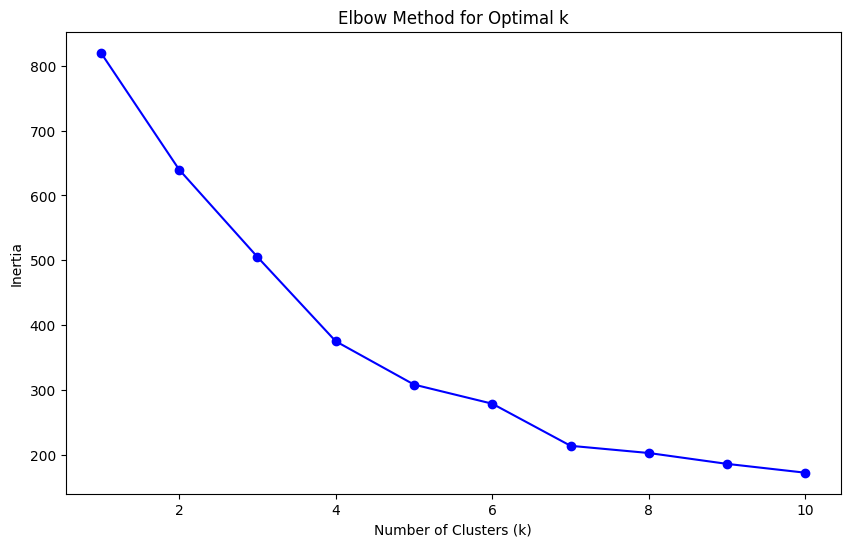

In [112]:
# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

<ipython-input-113-2ab9f5a3a22c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['C_KMpp'] = C_kmpp


array([0, 0, 3, 0, 0, 0, 3, 0, 3, 0], dtype=int32)

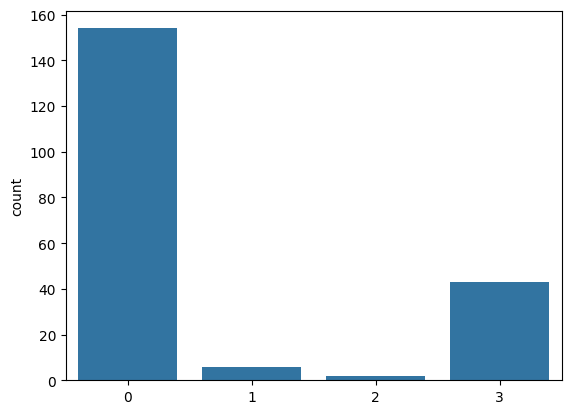

In [113]:
# Melakukan clustering dengan jumlah cluster yang optimal
optimal_k = 4  # Ganti dengan nilai optimal dari hasil Elbow Method
kmeans = cluster.KMeans(n_clusters=optimal_k, random_state=42)
kmPP = cluster.KMeans(n_clusters=optimal_k, init='k-means++', random_state=21)
kmPP.fit(df_encoded)
C_kmpp = kmPP.predict(df_encoded)
sns.countplot(x=C_kmpp)
df_encoded['C_KMpp'] = C_kmpp
C_kmpp[:10]

In [114]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_encoded, C_kmpp)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6152918822074936


In [115]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
# Assuming df_encoded contains your DataFrame with categorical features

# 1. Identify categorical features (replace with actual column names)
# Ensure these column indices are within the bounds of your DataFrame
categorical_features = [0, 1, 2, 3, 4]  # Adjusted to match the actual number of columns in df_encoded

# 2. Create a OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with KMeans

# 3. Fit the encoder on the categorical features and transform the data
encoded_data = encoder.fit_transform(df_encoded.iloc[:, categorical_features])

# 4. Create a new DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(df_encoded.columns[categorical_features]))

# 5. Concatenate the encoded features with the numerical features (if any)
# Assuming df_encoded has numerical features as well, you might need to select them
# Replace numerical_features with the actual column indices or names
# numerical_features = [columns in df_encoded that are numerical]
# final_df = pd.concat([df_encoded.iloc[:, numerical_features], encoded_df], axis=1)

# In this case, replace final_df with encoded_df as we are using encoded data only
final_df = encoded_df

# 6. Perform KMeans clustering using the processed data
# Fit the kmeans model to the data before predicting
kmeans.fit(final_df) # This line is added to fit the kmeans model
clusters = kmeans.predict(final_df)

print('Segmen : {}\n'.format(clusters))

# Menggabungkan data awal dan segmen
# In this case, we'll use the original df_encoded for merging
df_encoded['cluster'] = clusters
print(df_encoded.head(15))

Segmen : [2 2 1 2 0 2 1 2 1 0 2 1 2 0 0 0 1 2 1 0 0 0 0 0 2 1 1 1 0 1 0 1 0 0 2 0 2
 0 1 0 1 1 2 0 1 1 2 0 0 1 0 1 2 3 2 3 0 2 1 0 1 1 2 1 1 0 3 0 0 2 0 2 2 2
 0 2 0 0 2 1 1 2 0 2 2 2 2 0 2 1 0 2 1 0 2 2 2 1 0 2 2 0 2 2 0 1 2 0 2 1 2
 1 2 2 1 0 2 2 2 2 2 2 1 1 3 3 3 1 0 3 0 3 0 3 0 3 3 0 0 0 2 3 3 0 1 0 2 2
 3 3 0 2 2 3 0 3 3 2 1 3 3 0 2 1 3 1 1 0 1 3 1 3 3 0 0 3 3 3 0 3 3 3 3 2 2
 3 1 3 2 3 3 3 3 2 3 1 3 3 3 3 3 3 3 3 3]

    Penghasilan  Lama Kuliah Waktu Mendapatkan Pekerjaan: Program Studi  \
8     5000000.0            4                            2             4   
11    5400000.0            4                            5             4   
16   12000000.0            5                            2             4   
17    6000000.0            7                            2             4   
18    6000000.0            5                            9             4   
19    5000000.0            4                            2             4   
20    8000000.0            4                    

<ipython-input-115-0acac4daa147>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['cluster'] = clusters


<ipython-input-116-0f8130942b74>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['cluster'] = C_kmpp  # Add cluster assignments to df_encoded


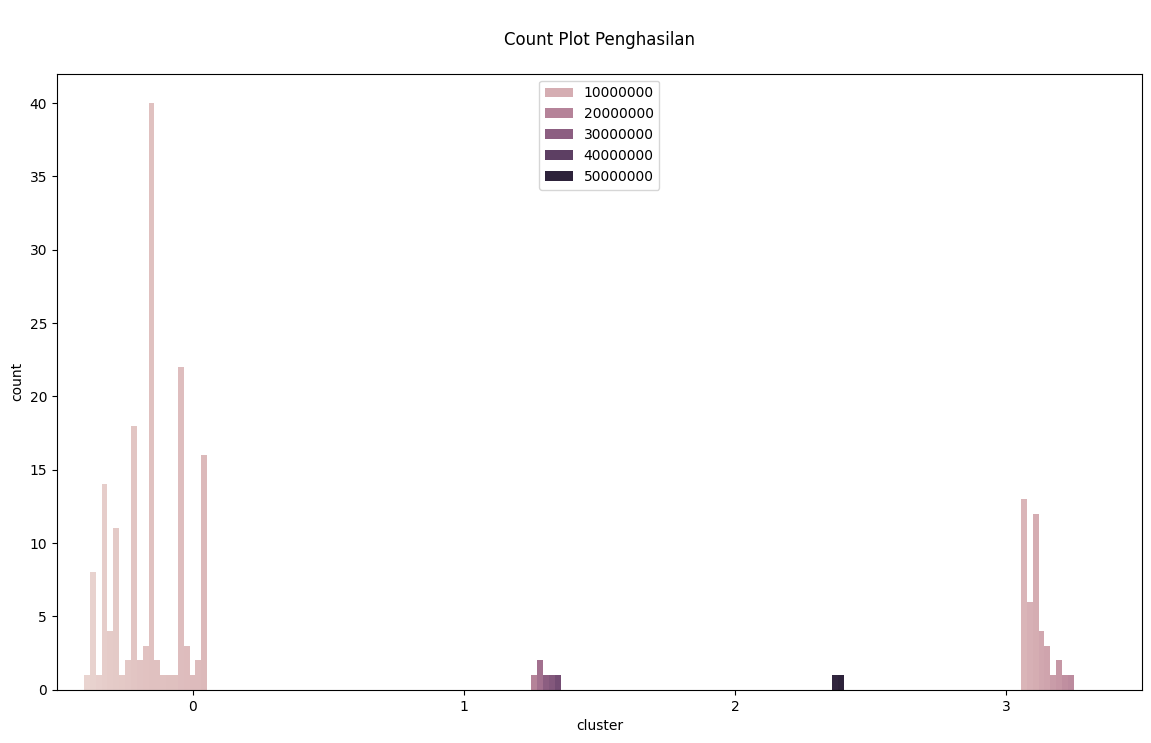

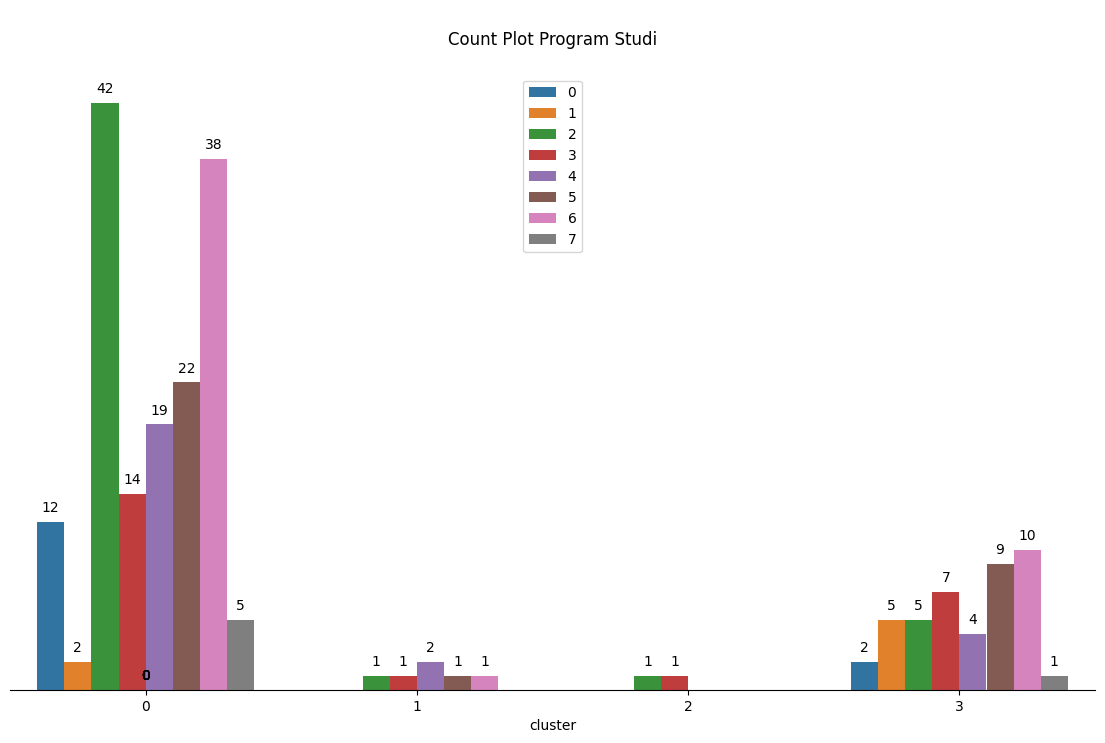

In [116]:
# Assuming 'Penghasilan' and 'Program Studi' are the numerical columns
# and 'cluster' is the column representing cluster assignments.
kolom_num = ['Penghasilan', 'Program Studi']  # Update kolom_num with numerical columns

# If the cluster assignments are in a separate variable 'C_kmpp':
df_encoded['cluster'] = C_kmpp  # Add cluster assignments to df_encoded

for i in kolom_num:
    plt.figure(figsize=(14,8))
    ax = sns.countplot(data = df_encoded, x = 'cluster', hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper center")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center',
    va = 'center',
    xytext = (0, 10),
    textcoords = 'offset points')

sns.despine(right = True,top = True, left = True)
ax.axes.yaxis.set_visible(False)
plt.show()

Cluster 0 : Terlihat bahwa pada cluster ini paling banyak diisi oleh Prodi Biologi dan berpenghasilan Rp.10.000.000.00

Cluster 1 : Pada cluster ini paling banyak diisi oleh Prodi Kimia dan berpenghasilan Rp.10.000.000-Rp.20.000.000.00

Cluster 2 : Terlihat bahwa pada cluster ini diisi oleh Prodi Biologi dan Prodi Fisika dengan penghasilan paling tinggi yaitu Rp.50.000.000.00

Cluster 3 : Pada cluster terakhir ini paling banyak diisi oleh Prodi Teknik Informatika dan berpenghasilan Rp.10.000.000-Rp.20.000.000.00


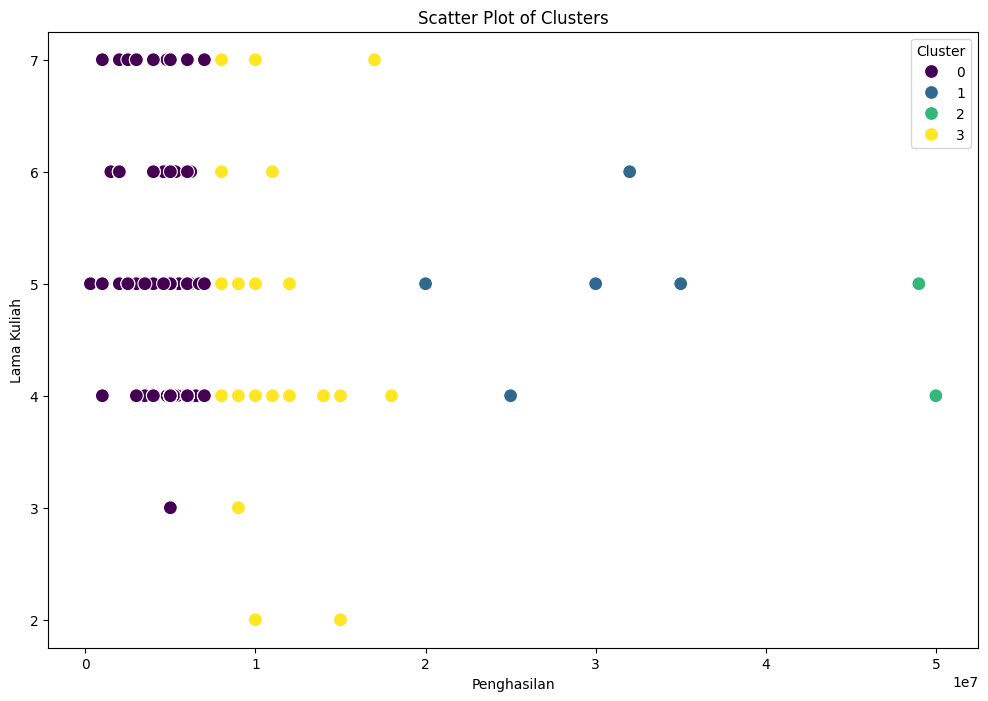

In [117]:
# Scatter plot untuk dua kolom numerik dengan warna berbeda untuk setiap klaster
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Penghasilan', y='Lama Kuliah', hue='cluster', data=df_encoded, palette='viridis', s=100)
plt.title("Scatter Plot of Clusters")
plt.xlabel("Penghasilan")
plt.ylabel("Lama Kuliah")
plt.legend(title='Cluster')
plt.show()


Cluster 0 (ungu): Terlihat bahwa sebagian besar data pada cluster ini berada pada rentang penghasilan yang lebih rendah. Lama kuliah pada cluster ini berkisar antara 3 hingga 7 tahun.

Cluster 1 (biru): Anggota di cluster ini umumnya memiliki penghasilan yang lebih tinggi dibandingkan cluster 0, dan lama kuliah mereka berada di sekitar 5-6 tahun.

Cluster 2 (hijau): Cluster ini menunjukkan penghasilan tertinggi, dengan lama kuliah yang bervariasi antara 4 hingga 6 tahun. Cluster ini kemungkinan mewakili kelompok dengan pencapaian karier tertinggi.

Cluster 3 (kuning): Banyak data di cluster ini menunjukkan penghasilan yang relatif lebih rendah dan memiliki lama kuliah yang cukup beragam, tetapi mayoritas berkisar pada 4-5 tahun.

<ipython-input-118-66fe69dfcccf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='Penghasilan', data=avg_income, palette='viridis')


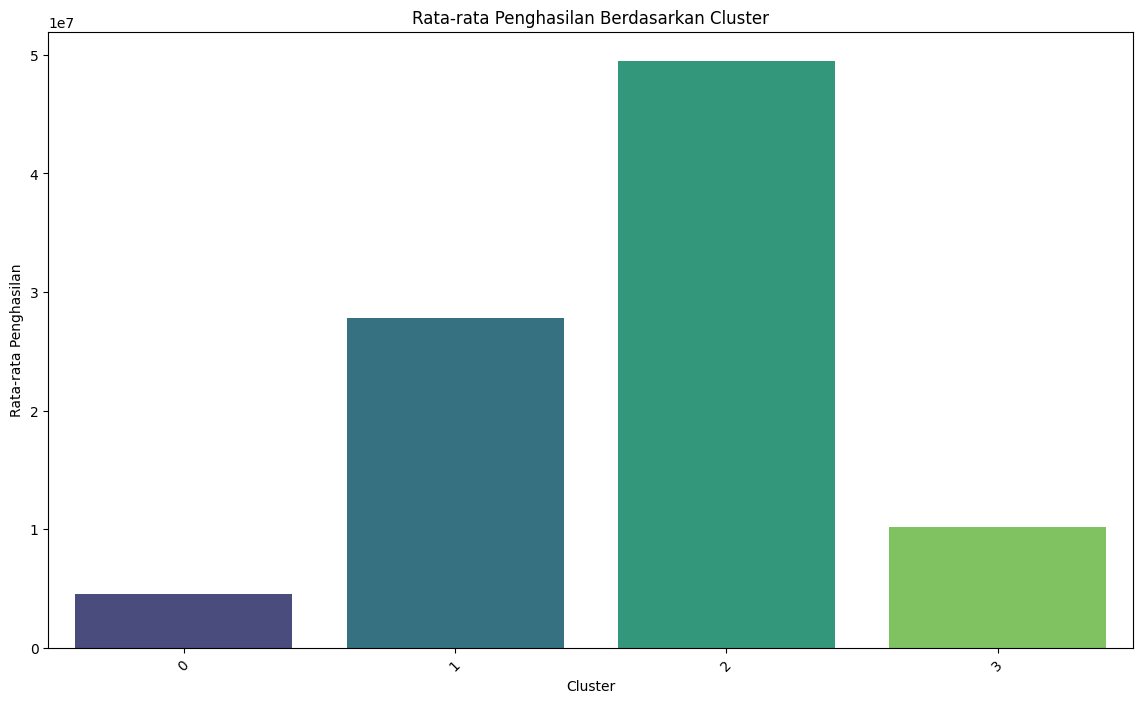

In [118]:
plt.figure(figsize=(14, 8))
avg_income = df_encoded.groupby('cluster')['Penghasilan'].mean().reset_index()
sns.barplot(x='cluster', y='Penghasilan', data=avg_income, palette='viridis')
plt.title("Rata-rata Penghasilan Berdasarkan Cluster")
plt.xlabel("Cluster")
plt.ylabel("Rata-rata Penghasilan")
plt.xticks(rotation=45)
plt.show()


Cluster 0 : Terlihat bahwa rata-rata penghasilan pada cluster ini adalah yang paling rendah dan berada di sekitar nilai rata-rata penghasilan 0-1.

Cluster 1 : Terlihat bahwa rata-rata penghasilan pada cluster ini lebih tinggi dibanding cluster 0 dengan berada di sekitar nilai rata-rata penghasilan 0-3.

Cluster 2 : Cluster ini menunjukkan rata-rata penghasilan tertinggi, dengan berada dinilai rata-rata penghasilan 0-5. Cluster ini kemungkinan mewakili kelompok dengan pencapaian karier tertinggi.

Cluster 3 : Banyak data di cluster ini menunjukkan rata-rata penghasilan yang relatif rendah dan memiliki nilai rata-rata penghasilan di 0-1.


<ipython-input-119-bb2578bb030b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['Cluster'] = kmPP.fit_predict(X)


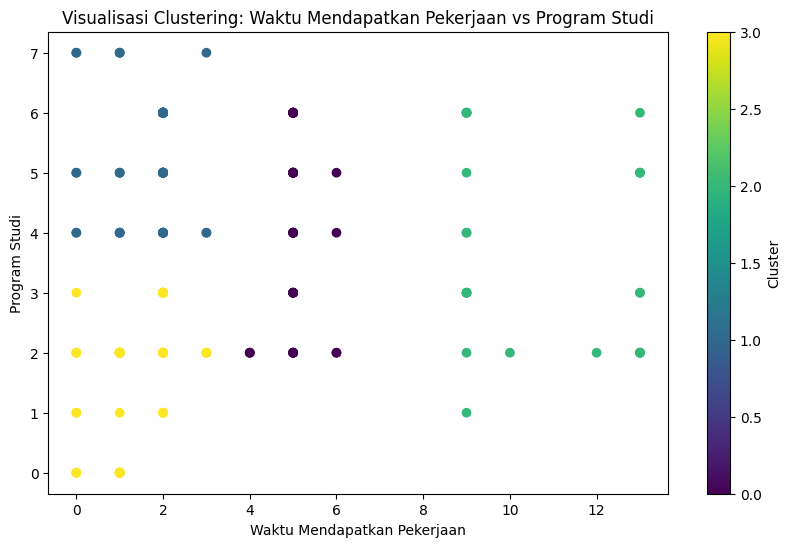

In [119]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Langkah 1: Siapkan Data
# Misalkan 'df_encoded' sudah memiliki kolom yang diperlukan setelah proses encoding
X = df_encoded[['Waktu Mendapatkan Pekerjaan:', 'Program Studi']]

# Langkah 2: Jalankan Clustering K-Means
kmPP = cluster.KMeans(n_clusters= 4, init='k-means++', random_state=21)
df_encoded['Cluster'] = kmPP.fit_predict(X)

# Langkah 3: Visualisasi Clustering
plt.figure(figsize=(10, 6))
plt.scatter(X['Waktu Mendapatkan Pekerjaan:'], X['Program Studi'], c=df_encoded['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Waktu Mendapatkan Pekerjaan')
plt.ylabel('Program Studi')
plt.title('Visualisasi Clustering: Waktu Mendapatkan Pekerjaan vs Program Studi')
plt.show()


Cluster 0 (Ungu): Waktu mendapatkan pekerjaan (4-7 bulan) dengan waktu tunggu bervariasi.

Cluster 1 (Biru): Cenderung mendapatkan pekerjaan lebih cepat (0-4 bulan)

Cluster 2 (Hijau): Waktu mendapatkan pekerjaan lebih lama (8-13 bulan)

Cluster 3 (Kuning): Cenderung mendapatkan pekerjaan lebih cepat (0-4 bulan)

Dari pengamatan melalui beberapa plot kami mendapat hasil kategori kluster:

**Cluster 0 (Ungu) :**
*   Program Studi: Paling banyak diisi oleh Prodi Biologi.
*   Penghasilan: sekitar Rp. 10.000.000.
*   Lama Kuliah: 3-7 tahun.
*   Waktu Mendapatkan Pekerjaan: Waktu mendapatkan pekerjaan (4-7 bulan)

**Cluster 1 (Biru) :**
*   Program Studi: Paling banyak diisi oleh Prodi Kimia.
*   Penghasilan: Rp. 10.000.000 hingga Rp. 20.000.000.
*   Lama Kuliah: 5-6 tahun.
*   Waktu Mendapatkan Pekerjaan: Cenderung lebih cepat, antara 0-4 bulan.

**Cluster 2 (Hijau) :**
*   Program Studi: Paling banyak diisi oleh Prodi Biologi dan Fisika.
*   Penghasilan: Tertinggi, mencapai Rp. 50.000.000.
*   Lama Kuliah: 4-6 tahun.
*   Waktu Mendapatkan Pekerjaan: 8-13 bulan.

**Cluster 3 (Kuning) :**
*   Program Studi: Paling banyak diisi oleh Prodi Teknik Informatika.
*   Penghasilan: Rp. 10.000.000 hingga Rp. 20.000.000.
*   Lama Kuliah: 4-5 tahun
*   Waktu Mendapatkan Pekerjaan: Cenderung lebih cepat, antara 0-4 bulan.


# Kesimpulan

Untuk mempersiapkan mahasiswa yang dapat bersaing di dunia kerja, diperlukan strategi yang sesuai dengan setiap kluster sehingga dapat mempersiapkan mahasiswa yang dapat bersaing di dunia kerja. Berikut adalah beberapa rekomendasi berdasarkan karakteristik masing-masing kluster:

**1. Cluster 0 (Ungu):**
- Mengadakan pelatihan tambahan seperti manajemen laboratorium, riset, atau kemampuan presentasi dapat ditingkatkan agar lulusan lebih kompetitif dan mempercepat mendapatkan kerja.
- Bimbingan karir intensif dan peluang magang perlu ditingkatkan untuk membantu lulusan mendapatkan pekerjaan lebih cepat.


**2. Cluster 1 (Biru):**

- UIN dapat menjalin lebih banyak kerja sama dengan perusahaan kimia atau farmasi yang membutuhkan lulusan kimia sehingga lulusan dapat langsung ditempatkan setelah lulus.
- Persiapan menuju magang bisa lebih diutamakan agar para mahasiswa dapat bekerja langsung di perusahaan tempat magang.


**3. Cluster 2 (Hijau):**

- UIN dapat melakukan program seperti, alumni mentorship untuk meningkatkan kompetensi untuk posisi-posisi senior atau teknis.
- Bekerja sama dengan lembaga riset atau industri khusus agar lulusan dapat ditempatkan di posisi yang sesuai dengan kompetensi.
- Agar lulusan UIN cepat mendapatkan kerja, UIN dapat mengadakan program sertifikasi yang berkaitan langsung dengan industri sains dan teknologi.

**4. Cluster 3 (Kuning)**:

- Mengadakan lebih banyak job fair atau kerja sama dengan perusahaan teknologi.
- Mengingat lama tunggu kerja yang singkat, UIN dapat mengadakan pelatihan kewirausahaan untuk mendukung lulusan yang ingin memulai bisnis di sektor teknologi.
- Memberikan lebih banyak pelatihan soft skills seperti presentasi, komunikasi, dan networking.

Dengan strategi-strategi ini, diharapkan dapat membantu para lulusan lebih siap menghadapi dunia kerja, mengurangi waktu tunggu untuk bekerja, dan meningkatkan peluang kesuksesan di jalur karier yang sesuai dengan bidang yang ditekuni.